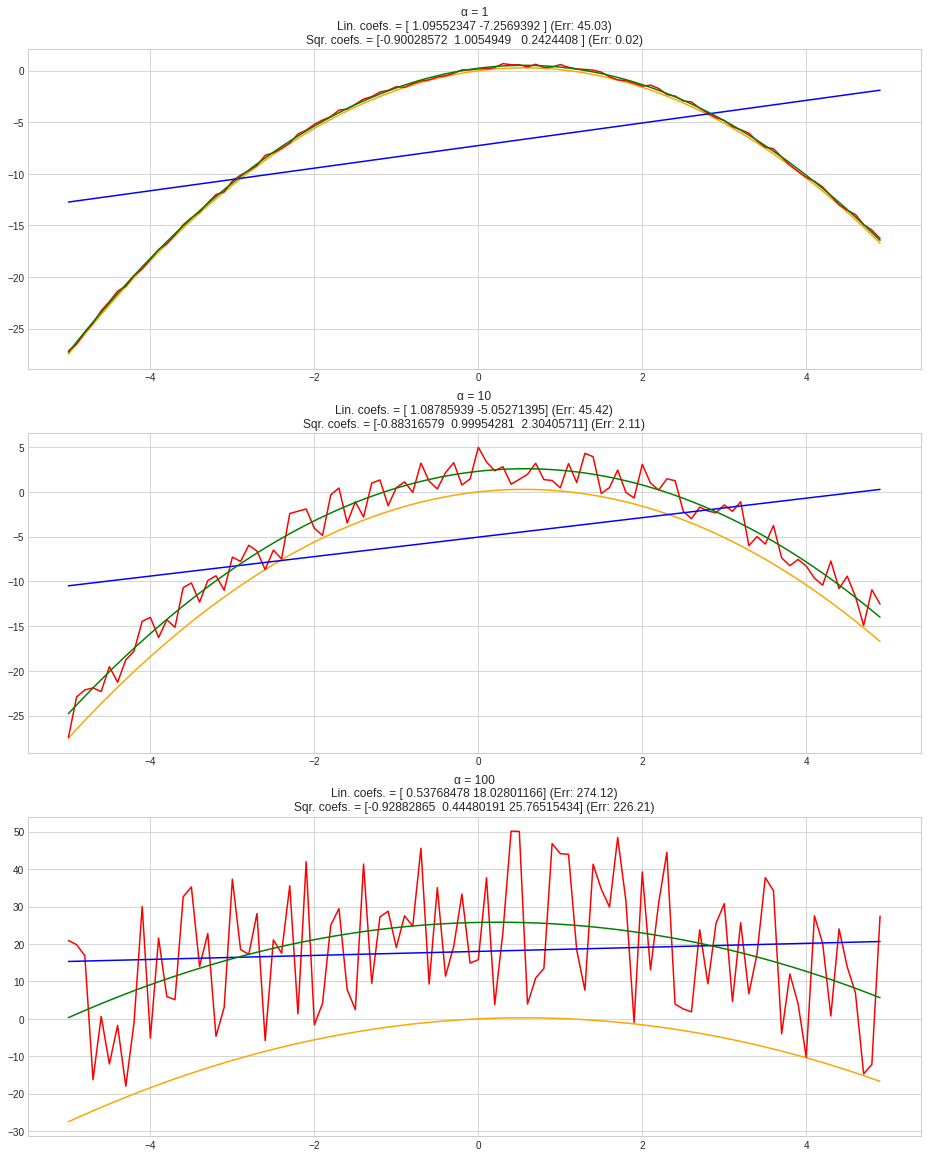

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np

plt.style.use('seaborn-whitegrid')
random.seed(42)

func = lambda x: x - 0.9*x**2

def func_factory(α):
    return lambda x: func(x) + α * random.random()*0.5

X = list(np.arange(-5, 5, 0.1))
Y0 = [func(x) for x in X]
Y1 = [func_factory(1)(x) for x in X]
Y2 = [func_factory(10)(x) for x in X]
Y3 = [func_factory(100)(x) for x in X]

Ys = [Y1, Y2, Y3]
def get_poli_func(alphas):
    assert len(alphas) > 1 and len(alphas) < 4
    if len(alphas) == 3:
        return lambda x: alphas[0]*x**2+alphas[1]*x+alphas[2]
    return lambda x: alphas[0]*x+alphas[1]

def lstsq(A, y):
    return np.linalg.lstsq(A, y, rcond=None)[0]

def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()

# def error(actual, pred): 
#     actual, pred = np.array(actual), np.array(pred)
#     return (np.absolute(np.subtract(actual, pred) / actual)).mean() * 100

lin_apprxs, sqr_apprxs = [], []
lin_coefs, sqr_coefs = [], []
lin_mses, sqr_mses = [], []
for Y in Ys:
    A_sqr = np.array([[x**2, x, 1] for x in X])
    A_lin = A_sqr[:, 1:]
    lin_coefs.append(lstsq(A_lin, Y))
    sqr_coefs.append(lstsq(A_sqr, Y))
    lin_apprxs.append([get_poli_func(lin_coefs[-1])(x) for x in X])
    sqr_apprxs.append([get_poli_func(sqr_coefs[-1])(x) for x in X])
    
    lin_mses.append(mse(Y, lin_apprxs[-1]))
    sqr_mses.append(mse(Y, sqr_apprxs[-1]))

fig, axs = plt.subplots(3, figsize=(16, 20))

for i in range(len(Ys)):
    axs[i].set_title("α = 1"+i*"0" + 
                     f"\nLin. coefs. = {str(lin_coefs[i])} (Err: {lin_mses[i]:.2f})" +
                     f"\nSqr. coefs. = {str(sqr_coefs[i])} (Err: {sqr_mses[i]:.2f})")
                     
    axs[i].plot(X, Y0, color="orange")
    axs[i].plot(X, Ys[i], color="red")
    axs[i].plot(X, lin_apprxs[i], color="blue")
    axs[i].plot(X, sqr_apprxs[i], color="green")